<a href="https://colab.research.google.com/github/DK905/yandex_praktikum_data-analyst/blob/main/%D0%98%D0%B3%D1%80%D1%8B_%D0%A1%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание проекта

Интернет-магазин "Стримчик" продаёт по всему миру компьютерные игры, и для повышения продаж ему необходимо знать закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Для выявления закономерностей, используются данные из открытых источников:  доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Данные доступны до 2016 года, но могут быть неполными в случае последнего года. Для них нужно отработать принцип обработки: не важно, прогнозируются ли продажи на 2017 год по данным 2016-го, или же 2027-й — по данным 2026 года, собранная схема анализа позволит осуществлять обобщённые исследования.

Данные представлены в датасете `games.csv`, колонкам которого соответствует следующая информация:  
- `Name` — название игры;  
- `Platform` — платформа;  
- `Year_of_Release` — год выпуска;  
- `Genre` — жанр игры;  
- `NA_sales` — продажи в Северной Америке (миллионы долларов);  
- `EU_sales` — продажи в Европе (миллионы долларов);  
- `JP_sales` — продажи в Японии (миллионы долларов);  
- `Other_sales` — продажи в других странах (миллионы долларов);  
- `Critic_Score` — оценка критиков (от 0 до 100);  
- `User_Score` — оценка пользователей (от 0 до 10);  
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Этап 0. Настройка среды

In [ ]:
# Тип вывода результатов в jupiter
from IPython.core.interactiveshell import InteractiveShell

jup_conds = ['all',                # Показывать все вызовы
             'last',               # Показывать последнюю общность вызовов
             'last_expr',          # Показывать самый последний вызов
             'none',               # Ничего не показывать
             'last_expr_or_assign' # Показывать последний вызов или присваивание
            ]

InteractiveShell.ast_node_interactivity = jup_conds[0]

# Этап 1. Загрузка данных и настройка датасета

Импортируем `pandas` для обработки датасета, `numpy` для некоторых промежуточных действий, и библиотеку `stats` из модуля `scipy` - она нужна для грамотного и качественного проведения статистических тестов

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st

Загрузим датасет исторических данных о каждой игре: её продажи, оценки пользователей и критиков, жанры и платформы.  
Так как данные получены из открытых источников, то к ним нужно внимательно присматриваться на предмет ошибок: некоторые источники могут собирать только часть данных об игре, а в некоторых возможно повреждение собранных данных.

In [ ]:
df = pd.read_csv('/datasets/games.csv')

В датасете названия столбцов не очень удобны для работы - критерий осмысленности соблюдён, но нет единого регистра.  
Приведём все названия столбцов к нижнему регистру.

In [ ]:
df.columns = [col.lower() for col in df.columns]
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Этап 2. Предобработка данных

Начать предобработку данных стоит с просмотра информации о датафрейме.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Во многих столбцах датафрейма есть пропуски, а некоторые колонки и вовсе имеют неправильный тип.

## Предварительная аналитика

Получим количество пропусков для каждого столбца. Так можно заранее выявить возможные ошибки и неточности обработки.

In [ ]:
df.isna().sum(axis=0)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Аналогично, выявим наличие технической пометки '**TBD**' - это сокращение от *To Be Determined*. Оно служит для отметки неясностей или пропусков, которые надо заполнить.

In [ ]:
df[df.isin(['tbd'])].count()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         2424
rating                0
dtype: int64

По количеству пропусков, столбцы можно разделить на несколько групп:  
1) **Нормальные**. Пропусков в них нет, и в предобработке они не нуждаются. Сюда можно отнести столбцы `platform`, `na_sales`, `eu_sales`, `jp_sales` и `other_sales`;  
2) **Запланированные**. В этих столбцах встречается техническая пометка неясности `tbd`. Она означает, что информации по данным ещё нет. Сюда относится столбец `user_score`;  
3) **Подозрительные**. В этих столбцах могут встречаться пропуски, которые нужно заполнять в зависимости от данных. Сюда относятся столбцы `critic_score`, `user_score`, и `rating` - не у каждой игры может быть оценка от критиков или пользователей, равно как и рейтинг игры: это может быть связано как с её низкой популярностью или недоступностью в большинстве регионов, так и с отсутствием нужных данных или ошибке в базе данных;  
4) **Аномальные**. В этих столбцах пропусков быть не должно, но они есть. Скорее всего, виновата нехватка данных из открытых источников, но обработать их нужно. К этим столбцам относятся `year_of_release`, `name` и `genre` - каждая игра была когда-либо создана, как-нибудь называется, и может быть отнесена к какому-либо существующему или новому жанру.

Перед заполнением пропусков, следует проанализировать данные. Например, уточнить уникальность.  
Столбцы с малым количеством уникальных значений можно просмотреть вручную и найти оптимальный способ заполнения пропусков, а для колонок с большим количеством - выбирать способ по назначению столбца с данными.

In [ ]:
unique_start = df.nunique()
unique_start

name               11559
platform              31
year_of_release       37
genre                 12
na_sales             402
eu_sales             307
jp_sales             244
other_sales          155
critic_score          82
user_score            96
rating                 8
dtype: int64

## Обработка аномальной группы

### Жанр и имя

Начать анализ можно со столбцов аномальной группы - столбца жанра и столбца имени. Так как в выборке есть лишь 12 уникальных жанров, то начать стоит с них.  
Порядок же следующий:  
- Просмотреть все возможные жанры в выборке. Так можно найти смысловые дубликаты или что-то необычное;  
- Вывести число записей для необычного критерия;  
- Определить значимость проблемы и решить её.

In [ ]:
df['genre'].unique().tolist()

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy',
 nan]

Проблема с жанрами обнаружена - здесь нет повторов или других необычностей, но есть лишь самые обычные пропуски.  
Количество таких записей уже известно, но его лучше проверить.

In [ ]:
len(df[df['genre'].isna()])

2

Всего две записи без жанра, их можно вывести и проанализировать вручную.

In [ ]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


А вот и связь с другим столбцом аномальной группы - именами. Попавшиеся записи и есть причина пропусков в этих двух значимых столбцах. Скорее всего, это произошло из-за некой ошибки в данных из открытых источников. 

Так как 2 записи - крайне незначительное количество относительно всего датасета на 16 715 записей, их можно убрать из выборки, ведь их влияние на исследование крайне незначительно.

In [ ]:
df.dropna(axis='index', how='any', subset=['genre'], inplace=True)

# Посмотрим, сколько записей без жанра
len(df[df['genre'].isna()])
# Отлично, их не осталось

0

### Год выпуска

Теперь, осталось разобраться с отсутствием года релиза. Его отсутствие также может быть вызвано ошибкой самих данных. Важно также обратить внимание на тот факт, что столбец года имеет тип `float64` - это произошло из-за наличия в нём пропусков.

Для начала, получим все записи без года релиза - может быть, закономерность обнаружит себя сразу.

In [ ]:
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Увы, причину отсутствия года нельзя назвать в лоб - данные выглядят самыми обычными. Быть может, нам повезло и какой-то один год не попал в выборку. Названия игр говорят об обратном, но нужно проверить эту возможность.

In [ ]:
# Фактическое количество разных годов, но с учётом NaN
years_fact = len(sorted(df['year_of_release'].unique()))
# Длина диапазона лет, от минимального до максимального года. +1 из-за NaN
years_hyps = len(range(int(df['year_of_release'].min()), int(df['year_of_release'].max())+1)) + 1
# Разница между реальным и ожидаемом количеством разных лет
years_fact - years_hyps

0

Гипотеза провалилась - никакой год из выборки не выпадал, так как количество разных лет совпало у реальности и ожидания.  
Следовательно, пропуски относятся к разным годам, а их отсутствие - результат некой технической ошибки. Но для спокойствия, лучше дополнительно посмотреть на гистограмму распределения игр по годам выпуска.

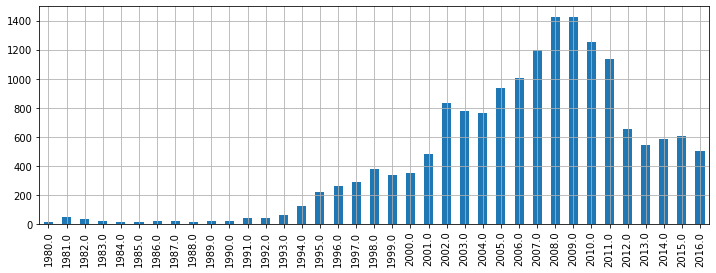

In [ ]:
df['year_of_release'].value_counts().sort_index().plot(kind='bar',
                                                       grid=True,
                                                       figsize=(12, 4));

Получившаяся гистограмма показала реалистичный рост выпуска игр, но после 2010-го года он резко пошёл на спад. Произошёл он из-за получившихся пропусков, или из-за естественных причин внутри игровой индустрии - вопрос, который можно разрешить через проверку значимости отсутствующих данных для выборки. Узнаем процент пропущенных данных.

In [ ]:
print(f"Пропуски года релиза составляют {len(df[df['year_of_release'].isna()]) / df.shape[0]:.0%} от всех данных")
print(f"В выборке представлено {years_fact - 1} лет")

Пропуски года релиза составляют 2% от всех данных
В выборке представлено 37 лет


2% от всех данных не могут столь существенно сказаться на промежутке в 37 лет, чтобы образовать спад игровой индустрии.  
Эти данные можно не учитывать - процент слишком незначительный.

In [ ]:
df.dropna(axis='index', how='any', subset=['year_of_release'], inplace=True)

После удаления пропусков, изменим тип столбца с `float64` на `int` - год не может быть не целым числом.

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('int')

Теперь, подсчитаем разницу в количестве уникальных значений до предобработки и до текущего этапа - так можно оценить, насколько критичной для выборки стала потеря данных.

In [ ]:
unique_middle = df.nunique()
unique_start - unique_middle

name               133
platform             0
year_of_release      0
genre                0
na_sales             1
eu_sales             0
jp_sales             0
other_sales          0
critic_score         1
user_score           0
rating               0
dtype: int64

После обработки аномальной группы, мы потеряли записи о 133-х уникальных играх. Это неприятно, но не должно значимо сказаться на дальнейших результатах.

## Обработка подозрительной группы

Теперь, нужно решить проблему с рейтингом игры и оценками от пользователей и критиков. В этих столбцах существуют как обычные `NaN` пропуски данных, так и помеченные пропуски `TBD`. Посмотрим, сколько сейчас таких записей.

In [ ]:
print(f"Неполные записи: {(df.isna().sum(axis=0) + df[df.isin(['tbd'])].count())['user_score'] / df.shape[0]:.0%}")
df.isna().sum(axis=0) + df[df.isin(['tbd'])].count()

Неполные записи: 55%


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

**55%** всех записей имеют незаполненное поле оценки игры пользователями. Если подсчитывать все поля с хотя бы одним пропуском в группе рейтинга, то этот процент поднимется ещё выше. Следовательно, пропуски в группе рейтинга опасно заполнять средним значением или медианой - это существенно исказит результаты. Удалять такие записи тоже нельзя - будет потеряно слишком много полезных данных в других категориях.

Существуют разные варианты решения проблемы пропусков для количественных и категориальных переменных.

Решение проблемы пропусков в количественных переменных:  
1) Заполнение пропусков нулями, медианой или средним арифметическим значением;  
2) Заполнение пропусков индикаторными переменными;  
3) Игнорирование записей с пропусками, если они не слишком сильно влияют на общую модель;  
4) Заполнение пропусков в соответствие с некой моделью для прогнозирования значения на месте пропуска.

Для категориальных переменных, решение аналогичное, но первые два пункта соответственно меняются на выделение пропусков в некую новую группу, или присоединение их к наиболее распространённой категориальной группе из уже существующих. В случае данной задачи, отсутствующих данных действительно много, что не позволяет просто заполнить их неким значением или же совместить с какой-либо группой. Игнорировать данные также нельзя - отсутствующих значений слишком много.

Вариант с заполнением пропусков в сответствие с некой моделью, здесь также не подойдёт. Можно было бы равномерно заполнить пропуски для каждой группы, но в условиях текущей модели данных, прогнозирование будет либо неточным, либо приведёт к искусственному созданию зависимости между данными.

Оптимальным решением этой проблемы будет компромисс между заполнением данных и их игнорированием. Для **количественных переменных**, пропуски можно сохранить: *в большинстве случаев, `pandas` автоматически отфильтровывает пустые значения, а где они сохраняются - там можно использовать методы вроде `notnull()`*. Для **категориальных переменных**, пропуски лучше выделить в отдельную группу. Назовём ёё уже знакомым сокращением `TBD`.

In [ ]:
# Заполнение сокращения TBD в колонке оценки пользователей на NaN
df['user_score'].replace('tbd', np.nan, inplace=True)
# Когда в столбце остались только NaN и числа, его тип следует изменить на числовой
df['user_score'] = pd.to_numeric(df['user_score'])

# Заполнение пропусков в колонке рейтинга на TBD
df['rating'].fillna('TBD', inplace=True)

Закрепляя результат, можно посмотреть количество пропусков по всему датафрейму. Быть может, где-то ещё остались данные.

In [ ]:
df.isna().sum(axis=0)

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Записи с пустыми полями остались только в тех столбцах, где это допустимо - предобработка данных почти завершена.

## Дополнение данных

Перед непосредственным анализом данных, необходимо закончить предобработку данных добавлением в датафрейм нового столбца суммарных продаж во всех регионах - это позволит улучшить качество дальнейшего анализа.

In [ ]:
# Вставим новый столбец total_sales перед 8-м столбцом critic_score
df.insert(8, 'total_sales', df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1))
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,TBD
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,TBD


# Этап 3. Исследовательский анализ данных

Данные обработаны, и их можно исследовать. В задачах проекта стоит анализ данных по годам, для прогнозирования и улучшения прибыли.

## Определение стартового периода для анализа

Первым шагом будет определение количества выпущенных игр для каждого года, и отсеивание уже не актуальных периодов.

Вернёмся к графику, который был использован в начале предобработки данных.

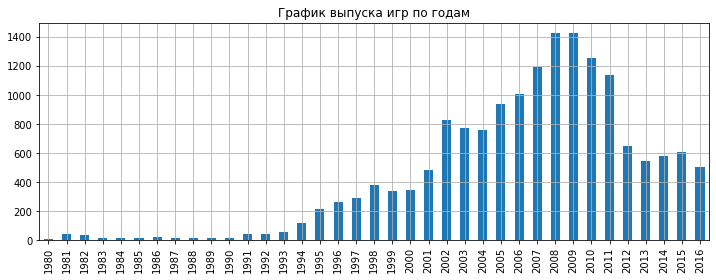

In [ ]:
df['year_of_release'].value_counts().sort_index().plot(kind='bar',
                                                       grid=True,
                                                       figsize=(12, 4),
                                                       title='График выпуска игр по годам');

Эта общая гистограмма наглядно демонстрирует развитие индустрии видеоигр - до появления первого персонального компьютера Altair-8800, их количество было близко к нулю, зато потом начало резко расти. Так, уже в 1994-м году, было выпущено свыше пятиста игр за год. Примем это значение за начальную планку отсеивания.

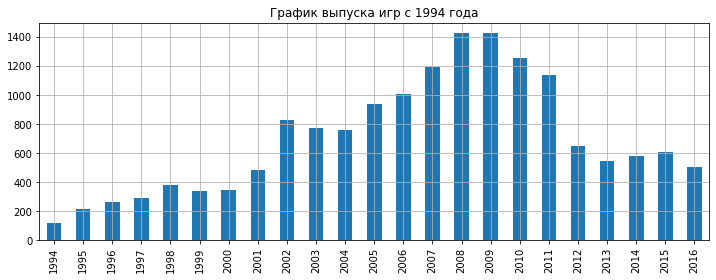

In [ ]:
df.query('year_of_release >= 1994')['year_of_release'].value_counts().sort_index().plot(kind='bar',
                                                                                        grid=True,
                                                                                        figsize=(12, 4),
                                                                                        title='График выпуска игр с 1994 года');

Первичное отсеивание улучшило наглядность распределения. Уже сейчас видно, что, начиная с 2001-го года, в игровой индустрии начался значимый прогресс. Следовательно, можно снова ограничить рассматриваемый период выборкой старше 2000-го года.

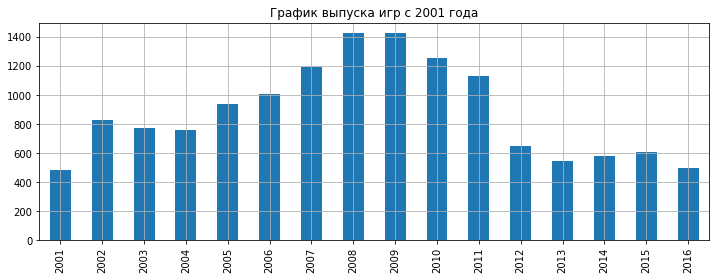

In [ ]:
df.query('year_of_release > 2000')['year_of_release'].value_counts().sort_index().plot(kind='bar',
                                                                                       grid=True,
                                                                                       figsize=(12, 4),
                                                                                       title='График выпуска игр с 2001 года');

Получившаяся подборка демонстрирует как успехи в игровой индустрии, так и своеобразные провалы. Эти результаты тесно связаны с общемировой историей.

Успехи развития игровой индустрии связаны с активной информационной экспансией человечества: последние два десятилетия стали переворотной для игропрома за счёт развития компьютерной отрасли в целом - вычислительные мощности возросли в сотни раз, расширяя возможности для графической и функциональной компонент разрабатываемых игр. Развитие интернета, повышение качества связи, а также многое другое - всё это сказалось на количестве продаж видеоигр.

Спад продаж, заметный по столбцам последних шести лет выборки, тоже связан с историей - но уже не с развитием компьютерных технологий. Скорее всего, он произошёл как следствие глобального экономического кризиса 2008-2009 годов: падение ВВП многих стран и беспрецедентный рост безработицы, сокращение мировой торговли на 10%, падение рынков ценных бумаг. Последствия кризиса трудно определить и перечислить в полной мере даже сегодня, но они оказали значимое влияние и на рынок видеоигр.

Предположим, следующее объяснение наблюдаемого падения игровой индустрии после мирового финансового кризиса. В 2008-2009 годах, она демонстрировала рекордные для себя прибыли, связанные с успешным выпуском уже разработанных продуктов - на них не так сильно сказались происходящие события за счёт особенностей цикла разработки игр, который как правило длится несколько лет. Людям, сохранившим работу, нужны были развлечения, а цифровые товары (видеоигры) оказались одним из самых доступных таких средств. Постепенно, кризис преодолевался, но тут сыграл свою роль ранее упомянутый цикл разработки игр: продукты, разработка которых начиналась в период кризиса, были ограничены в количестве доступных денежных и человеческих ресурсов. Это сказалось на их качестве, и попав на прилавки уже после кризиса, они привлекали всё меньшее количество людей, которые вне кризиса могли позволить себе приобретение даже не такого качественного продукта, но после него - были вынуждены искать альтернативные развлечения.

Как итог рассмотрения картины выпуска игр по годам, выборку для полученного периода (2000-2016гг) стоит закрепить в качестве основного датасета - это позволит получить более актуальные данные о развитии игропрома. Такое временное ограничение также позволяет исключить значимое искажение распределение по платформам в 2016 году, что повысит качество результата. При этом, 2000-ный год, в отличие от предыдущего графика, также включается в период.

In [ ]:
df = df.query('year_of_release >= 2000')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,6.6,E


## Определение актуальности платформ

Второй шаг заключается в определении изменений продаж по платформам.

Сделать это можно с помощью небольшого исследования динамики нескольких платформ с наибольшими суммарными продажами - это уже не компании однодневки, и их можно принять за своеобразный стандарт классической платформы для геймдева. Начнём с выборки шести платформ, удовлетворяющих условию.

In [ ]:
top_platforms = df[['platform', 'total_sales']].groupby('platform').sum().nlargest(6, 'total_sales').index
top_platforms.tolist()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4']

После того, как был выделен список платформ с наибольшими суммарными продажами на момент рассматриваемого периода выборки, можно построить для него распределение продаж по годам.

In [ ]:
# Выборка данных по шести лучшим платформам
top_data = df[df['platform'].isin(top_platforms)]
# Сгруппированная выборка по годовым продажам для шести лучших платформ
sales_for_years = top_data.groupby(['year_of_release', 'platform'])['total_sales'].sum()

Получившееся распределение sales_for_years охватывает промежуток в 16 лет деятельности игровой промышленности, из-за чего его эффективнее всего анализировать с помощью общего графика прибыли для каждой платформы.

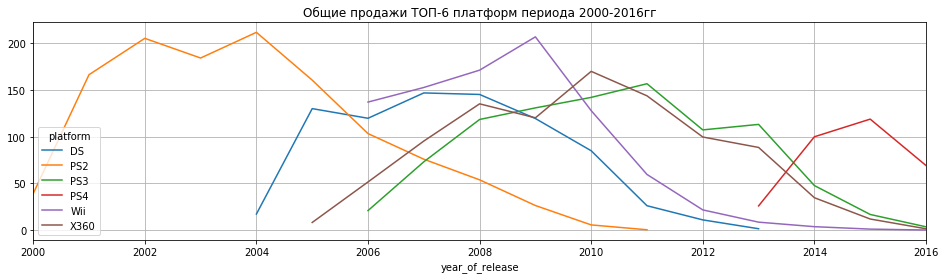

In [ ]:
sales_for_years.unstack().plot(kind='line',
                               grid=True,
                               figsize=(16, 4),
                               title='Общие продажи ТОП-6 платформ периода 2000-2016гг');

Построенный график распределения продаж наглядно демонстрирует процесс жизни платформы. Так, с 2000-го года, уже две игровых платформы - DS (11 лет) и PS2 (9 лет), завершили своё существование - их продажи упали до нуля. Продажи для платформ PS3 (10 лет, прибыль на 2016: 3.60), Wii (10 лет, прибыль на 2016: 0.18) и X360 (11 лет, прибыль на 2016: 1.52) практически приблизились к нулю, из-за чего их также можно считать платформами, популярными в прошлом.

Согласно полученному графику, характерный период жизни платформ составляет 10 лет. Однако, эти данные подходят лишь для популярных платформ: срок жизни платформы, как правило, связан с её популярностью - чем она выше, тем дольше сохраняются продажи. Так, можно отдельно вывести среднюю продолжительность жизни для популярных платформ, и отдельно для среднестатистической платформы.

In [ ]:
# Вывод характерного периода жизни для популярных платформ

# У нас уже есть список из ТОП-6 платформ с лучшими продажами, его можно применить
life_high = top_data[['platform', 'year_of_release']].groupby('platform').agg(lambda x: x.max() - x.min())

# Выделяем медианную продолжительность жизни популярных платформ
life_high = life_high['year_of_release'].median()
print(f'Характерный период жизни для популярных платформ составляет {life_high:.0f} лет')

Характерный период жизни для популярных платформ составляет 10 лет


In [ ]:
# Вывод характерного периода жизни для среднестатистической платформы

# Выборка "платформа - диапазон лет" аггрегируется лямбда-выражением разницы минимального и максимального лет
platform_years = df[['platform','year_of_release']].groupby('platform').agg(lambda x: x.max() - x.min())

# Сохраним медианный период жизни платформ в целом
life_mid = platform_years['year_of_release'].median()

print(f'Характерный период жизни среднестатистической платформы составляет {life_mid:.0f} лет')

Характерный период жизни среднестатистической платформы составляет 6 лет


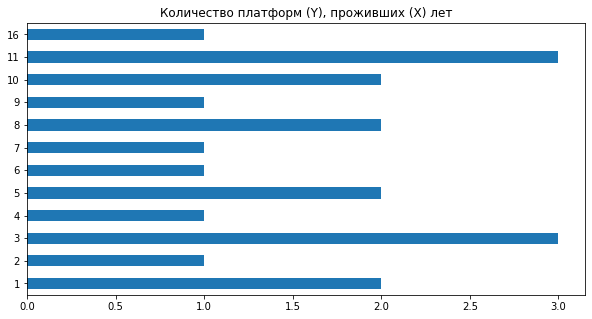

In [ ]:
# Отдельно получим среднее количество лет и построим график для него
platform_years['year_of_release'].value_counts().sort_index().plot(kind='barh',
                                                                   figsize=(10, 5),
                                                                   title='Количество платформ (Y), проживших (X) лет');

Как и было видно по графикам, характерный период жизни для популярных платформ составляет 10 лет. Эти данные будут полезны, если среди платформ появится новый, активно развивающийся лидер, для которого нужно приблизительно оценить оставшийся срок его прибыльности.

Статистический подсчёт характерного периода жизни платформ в общем случае, позволил уточнить этот срок до 6 лет.

Дополнительное выведение графика количества платформ для каждого срока жизни, даёт и общее представление о выбросах в выборке. Так, имеется некая платформа, существующая весь рассматриваемый период. Есть также несколько платформ со сроком жизни до четырёх лет, но характер данных говорит о том что это не выбросы. Использование медианы позволило игнорировать такие выбросы при получении уточнённой характеристики. Дополнительный график также даёт возможность сделать и другой интересный вывод: когда популярные платформы переходят на завершающую стадию своего жизненного цикла (*приблизительно, на 3/5 срока жизни*), возникает одна или несколько новых платформ, активно развивающихся и получающих прибыль.

## Определение потенциально прибыльных платформ

Основываясь на полученном графике, можно сделать небольшой прогноз по дальнейшему развитию рынка платформ: платформа PS4 продолжит развиваться и получать прибыль в течение ещё 4-5 лет, пока её не сместят другие платформы. На текущем графике, других потенциально прибыльных платформ нет - они были подавлены приоритетом текущих фаворитов рынка. Проанализируем обстановку на примере новой выборки платформ, составленной за последние шесть лет и не включающей в себя предыдущие платформы, продажи которых уже близки к нулю.

In [ ]:
# Выделение выборки из датафрейма
top_platforms_six = df.query('(year_of_release >= 2010) and (platform not in @top_platforms)')[['platform', 'total_sales']]
# Группировка по выборке
top_platforms_six = top_platforms_six.groupby('platform').sum().nlargest(5, 'total_sales').index.insert(5, 'PS4')
top_platforms_six.tolist()

['3DS', 'XOne', 'PC', 'WiiU', 'PSP', 'PS4']

После того, как был выделен список платформ с наибольшими суммарными продажами за последние шесть лет, можно построить для него распределение продаж по годам. При этом, стоит включить в график и более раннюю историю развития платформ - это позволит улучшить корректность выводов.

In [ ]:
sales_for_years_six = df.query('platform in @top_platforms_six').groupby(['year_of_release',
                                                                          'platform'])['total_sales'].sum()
# Отчёт по прибыли за последние два года
sales_for_years_six.tail(11)

year_of_release  platform
2015             3DS          27.78
                 PC            8.52
                 PS4         118.90
                 PSP           0.12
                 WiiU         16.35
                 XOne         60.14
2016             3DS          15.14
                 PC            5.25
                 PS4          69.25
                 WiiU          4.60
                 XOne         26.15
Name: total_sales, dtype: float64

Получившееся распределение sales_for_years_six охватывает многолетний промежуток деятельности игровой промышленности на шести разных платформах, из-за чего его эффективнее всего анализировать с помощью общего графика прибыли для каждой платформы. Его можно было бы сократить до промежутка в 6 последних лет, но это чревато возможной потерей динамики развития некоторых платформ долгожителей.

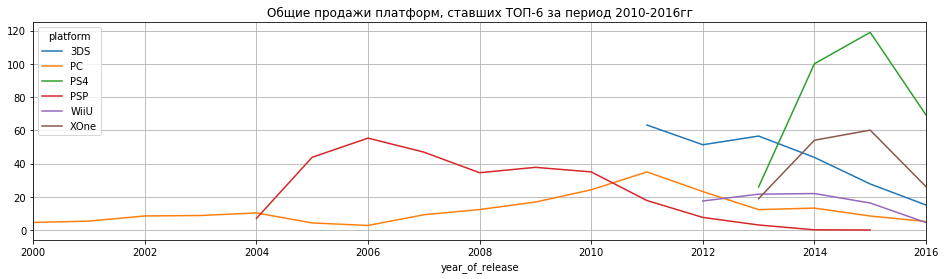

In [ ]:
sales_for_years_six.unstack().plot(kind='line',
                                   grid=True,
                                   figsize=(16, 4),
                                   title='Общие продажи платформ, ставших ТОП-6 за период 2010-2016гг');

Итоговый график выглядит иначе чем ожидалось - самые прибыльные платформы последних шести лет, не входящие в топ-6 (по заработку) платформ этого тысячелетия, демонстрируют падение за последний год выборки в датасете. 

Самыми прибыльными платформами можно считать **PS4** и **XOne** - обе эти платформы демонстрируют спад, но всё ещё остаются потенциально прибыльными. Однако, рассчитывать на рост их продаж не стоит - полученные графики дают твёрдый вывод о том, что платформа, после начала спада игровых продаж, начинает стремительно терять прибыль.

## Детальный анализ прибыльности платформ

Для возможности прогнозирования развития какой-либо новой платформы, стоит проанализировать прибыльность имеющихся платформ по разным параметрам. Начать стоит с boxplot графика глобальных продаж каждой игры с разбивкой по платформам - это позволит определить разницу в продажах. Для формирования современной картины, в качестве рассматриваемых платформ берётся выборка самых прибыльных платформ за последние шесть лет. При этом, платформу PSP можно исключить из рассмотрения - последний график наглядно показал её несостоятельность в настоящее время, и нет смысла прогнозировать прибыли от продаж игр для неё.

### Платформы, продажи и их ящик с усами

In [ ]:
# Данные по PSP уже не актуальны, извлечём их из топа
top_platforms_six = top_platforms_six.drop('PSP')

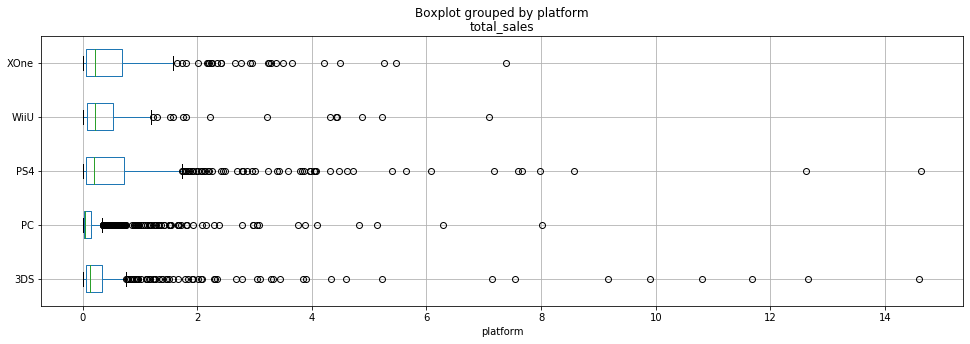

In [ ]:
# Выборка данных по самым прибыльным и актуальным платформам за последние шесть лет
best_platforms_actual = df.query('platform in @top_platforms_six')[['platform', 'total_sales']]

# Отключаем оповещение об устаревании - оно возникает из-за особенностей графика boxplot
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
# Построение горизонтального boxplot графика для каждой из платформ
best_platforms_actual.boxplot(column='total_sales',
                              by='platform',
                              grid=True,
                              figsize=(16, 5),
                              vert=False);

Boxplot график глобальных продаж каждой игры для каждой из платформ в ТОП-5 платформ за последние шесть лет, наглядно демонстрирует разницу в продажах. Однако, ориентироваться по нему крайне неудобно - мешают выбросы. Данные по выбросам необходимо учесть в выводе к данному этапу исследования, так как они могут влиять на популярность платформы и её общую прибыль.

Для исследования продаж игр, которые составляют основной костяк прибыли платформ, построим график с ограничением по оси количества продаж, это позволит точнее оценить ситуацию.

In [ ]:
best_platforms_actual.agg(['median', 'mean'])

,total_sales
median,0.100000
mean,0.460126


Медиана и среднее отличаются достаточно сильно, относительно своих значений. Это означает сильное влияние выбросов на выборку. Для рассмотрения в контексте ящика с усами, лучше сократить её до максимальных продаж равных 0.85 миллионов долларов. Так мы получим полный boxplot график для каждой из рассматриваемых платформ, на котором будет присутствовать некоторое количество выбросов - оно позволит наглядно охарактеризовать разницу между ними и медианным значением продаж платформы.

Выбранное значение полезно ещё и тем, что включает в себя медианы каждой платформы из ТОП-5 - это видно по первому графику.

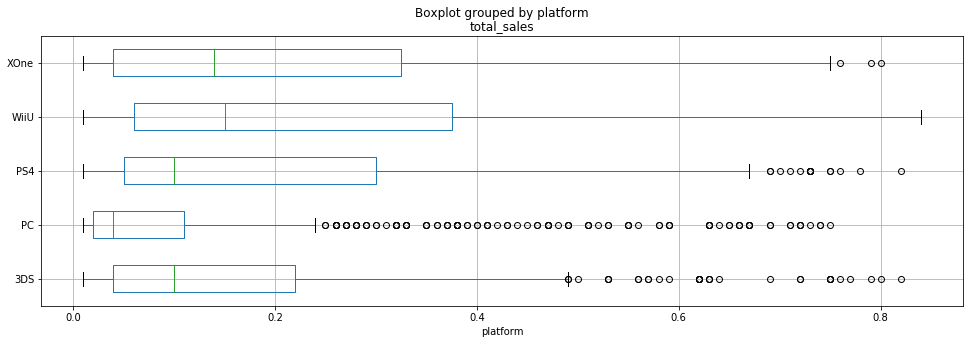

In [ ]:
# Выборка данных по самым прибыльным и актуальным платформам за последние шесть лет
best_platforms_actual = df.query('(platform in @top_platforms_six) and (total_sales < 0.85)')[['platform', 'total_sales']]

# Построение горизонтального boxplot графика для каждой из платформ
best_platforms_actual.boxplot(column='total_sales',
                              by='platform',
                              grid=True,
                              figsize=(16, 5),
                              vert=False);

Без учёта всех выбросов, график стал достаточно читаемым для исследования. Теперь, можно сравнить платформы между собой: медианная прибыль говорит об основном уровне получаемой прибыли с каждой игры, квартили ограничивают основную прибыль от выбросов, а разброс показывает популярность платформы в контексте покупаемости.

Согласно данным тезисам, доход платформ WiiU, XOne и PS4 является самым стабильным: их медианная прибыль и верхний квартиль (граница 3/4 прибыли) превосходят другие платформы. В совокупности с предыдущими исследованиями, этот факт предоставляет новую информацию о прибыльности платформ - PS4 и XOne статистически являются самыми популярными и перспективными платформами 2016-го года за счёт определённых игр с очень высокими уровнями продаж. Такие игры отображаются на первом boxplot графике в виде выбросов, что приводит нас к новому выводу.

**Игры-хиты, обретшие высокую популярность, очень сильно влияют на прибыль и популярность платформ, но не стоит забывать и про прибыль с менее крупных и популярных проектов.**

### Влияние оценок критиков и игроков на продажи игр для платформы PS4

Изученные графики позволяют выделить платформу PS4 в качестве современного лидера среди платформ, чьи финансовые позиции постепенно стремятся к нулю. Однако, данная платформа также лидирует по количеству выпущенных для неё игр - это позволяет на её примере исследовать влияние отзывов пользователей и критиков на продажи игр.

In [ ]:
# Выделение данных по платформе PS4
info_ps4 = df.query('platform == "PS4"')[['total_sales', 'critic_score', 'user_score']]
info_ps4.median()

total_sales      0.2
critic_score    73.0
user_score       7.0
dtype: float64

Проверить гипотезу о наличии влияния отзывов на продажи можно с помощью диаграммы рассеяния и корреляции. При этом, диаграмму рассеивания можно ограничить как по продажам, так и по оценкам: выбросы присутствуют и там и там, в связи с чем, графики ограничиваются согласно ранее построенным графикам.

Так, большая часть продаж сконцентрирована в диапазоне до одного миллиарда долларов. Это всего в три раза меньше максимального выброса, но и в 16 раз больше чем медианное значение. Своеобразная золотая середина - хоть сюда и входит некая доля выбросов, но оставшихся данных хватает для анализа.  

Оценки критиков и пользователей соответственно концентрируются в верхней половине своих диапазонов - почти везде они превышают 50% от максимальной оценки в категории, но не поднимаются свыше 95%. Но отвергать низкие оценки всё равно не целесообразно - так как исследуется их влияние на общую картину, то важно наблюдать весь диапазон оценок.

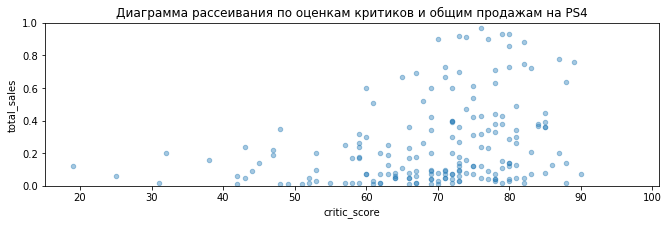

In [ ]:
# Диаграмма рассеивания для оценок критиков и общих продаж на PS4
info_ps4.plot(x='critic_score',
              y='total_sales',
              ylim=(0, 1.0),
              kind='scatter',
              figsize=(11, 3),
              alpha=0.4,
              title='Диаграмма рассеивания по оценкам критиков и общим продажам на PS4');

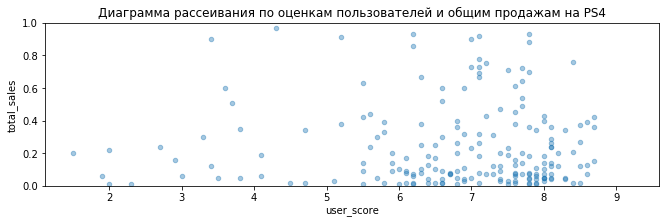

In [ ]:
# Диаграмма рассеивания для оценок пользователей и общих продаж на PS4
info_ps4.plot(x='user_score',
              y='total_sales',
              ylim=(0, 1.0),
              kind='scatter',
              figsize=(11, 3),
              alpha=0.4,
              title='Диаграмма рассеивания по оценкам пользователей и общим продажам на PS4');

Получившиеся диаграммы рассеивания показывают схожие картины - чем выше оценка, тем большее количество продаж и тем выше прибыль. При этом, влияние критиков кажется большим чем влияние пользователей. Так ли это, можно узнать с помощью корреляции.

In [ ]:
corr_critic_sales_ps4 = info_ps4['total_sales'].corr(info_ps4['critic_score'])
print(f'Коэффициент корреляции оценки критиков с общими продажами на PS4: {corr_critic_sales_ps4}')

corr_user_sales_ps4 = info_ps4['total_sales'].corr(info_ps4['user_score'])
print(f'Коэффициент корреляции оценки пользователей с общими продажами на PS4: {corr_user_sales_ps4}')

Коэффициент корреляции оценки критиков с общими продажами на PS4: 0.406567902061781
Коэффициент корреляции оценки пользователей с общими продажами на PS4: -0.031957110204556424


Закономерно, была выявлена корреляция оценки критиков на общие продажи - её коэффициент составил приблизительно 0.4, что говорит о наличии слабой связи. В случае оценки пользователей, картина получилась неожиданной: связь крайне слабая и отрицательная. Проверить результаты стоит для общего случая всех платформ - это позволит избежать ошибки нехватки данных, которые могли существовать в случае PS4.

### Влияние оценок критиков и игроков на продажи игр для всех современных платформ

Для начала, получим медианные значения по продажам и оценкам - это поможет скорректировать диаграммы рассеивания.

In [ ]:
info_all_platforms = df.query('(critic_score >= 0) and (user_score >= 0)')[['total_sales',
                                                                            'critic_score',
                                                                            'user_score']]

info_all_platforms.median()

total_sales      0.29
critic_score    72.00
user_score       7.50
dtype: float64

Полученные значения очень близки к медианным параметрам для PS4. Количество данных в выборке позволяет утверждать, что влияние PS4 на медианные значения всей выборки не столь значительно. Следовательно, результату можно доверять и использовать настройки диаграмм рассеивания из анализа PS4.

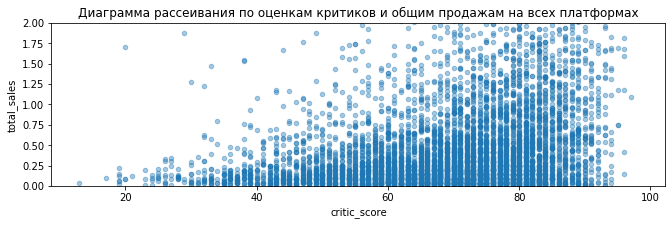

In [ ]:
# Диаграмма рассеивания для оценок критиков и общих продаж на всех платформах
info_all_platforms.plot(x='critic_score',
                        y='total_sales',
                        ylim=(0, 2.0),
                        kind='scatter',
                        figsize=(11, 3),
                        alpha=0.4,
                        title='Диаграмма рассеивания по оценкам критиков и общим продажам на всех платформах');

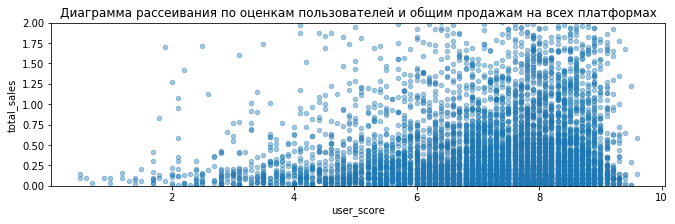

In [ ]:
# Диаграмма рассеивания для оценок пользователей и общих продаж на всех платформах
info_all_platforms.plot(x='user_score',
                        y='total_sales',
                        ylim=(0, 2.0),
                        kind='scatter',
                        figsize=(11, 3),
                        alpha=0.4,
                        title='Диаграмма рассеивания по оценкам пользователей и общим продажам на всех платформах');

In [ ]:
corr_critic_sales_all = info_all_platforms['total_sales'].corr(info_all_platforms['critic_score'])
print(f'Коэффициент корреляции оценки критиков с общими продажами: {corr_critic_sales_all}')
print(f'Связь, в общем случае, сильнее на {corr_critic_sales_all - corr_critic_sales_ps4}\n')

corr_user_sales_all = info_all_platforms['total_sales'].corr(info_all_platforms['user_score'])
print(f'Коэффициент корреляции оценки пользователей с общими продажами: {corr_user_sales_all}')
print(f'Связь, в общем случае, сильнее на {corr_user_sales_all - corr_user_sales_ps4}')

Коэффициент корреляции оценки критиков с общими продажами: 0.23043373766133185
Связь, в общем случае, сильнее на -0.17613416440044916

Коэффициент корреляции оценки пользователей с общими продажами: 0.08120167857026461
Связь, в общем случае, сильнее на 0.11315878877482104


Исходя из полученных результатов можно сделать вывод, что оценки критиков и пользователей незначительно влияют на продажи: при покупке продукта, мнение критиков становится авторитетнее мнения других игроков, однако и то и то не оказывает сильного влияния на решение о приобретении.

Такой результат может быть связан с подрывом доверия к оценочным ресурсам, а также со способом представления и распространения видеоигр как продуктов.

В пользу первой гипотезы говорит как картина современного мира, так и количество пропусков в изначальных данных: примерно половина записей не имеет одной из этих оценок, что в свою очередь можно трактовать либо как недобросовестный сбор информации открытыми источниками, либо как проблему системы оценивания игр.

Вторую гипотезу нельзя проверить по имеющимся данным, но современная модель распространения игр предполагает наличие широкого набора доступной информации о игре: трейлеры, фрагменты игрового процесса, обилие скриншотов и промо-материалов. Всё это современным пользователям даёт больше информации чем игровые оценки, хоть в ряде случаев и приводит к курьёзам и завышенным ожиданиям к игре.

### Влияние жанра игры на продажи

Влияние оценок критиков и пользователей на продажи не оказалось значимым. Стоит проанализировать другие возможности - например, игровой жанр. Быть может, есть жанры которые особо выгодно продавать, или напротив - от которых стоит держаться подальше.

In [ ]:
# Выделение жанров и их суммарных продаж
genres_sales = df[['genre', 'total_sales']].groupby('genre').sum().reset_index().sort_values(by='total_sales',
                                                                                             ascending=False)
genres_sales

,genre,total_sales
0,Action,1526.16
10,Sports,1130.92
8,Shooter,912.70
7,Role-Playing,731.22
3,Misc,718.35
6,Racing,561.06
4,Platform,494.42
9,Simulation,335.41
2,Fighting,311.90
1,Adventure,183.74


Для получившейся выборки информации о продажах, отсортированной по возрастанию значений, можно составить общий график. Это позволит наглядно определить самые популярные и непопулярные жанры.

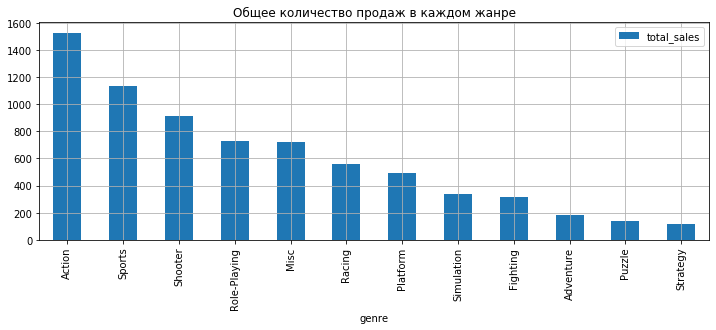

In [ ]:
genres_sales.plot(x='genre',
                  y='total_sales',
                  kind='bar',
                  grid=True,
                  figsize=(12, 4),
                  title='Общее количество продаж в каждом жанре');

Успех. По графику видно, что продажи игр в жанре **Action**, **Sports** и **Shooter** приносят больше всего денег, а **Strategy**, **Puzzle** и **Adventure** - меньше всего. Значит, увеличить продажи в магазине можно за счёт увеличения ассортимента игр жанров **Action**, **Sports** и **Shooter**, для самых современных платформ -  **PS4** и **XOne**.

# Этап 4. Составление портрета пользователя для каждого региона

## Региональный анализ популярности платформ

Продолжим исследование влияния свойств игрового продукта на продажи. В выборке представлены три основных региона: NA (Северная Америка), EU (Европа) и JP (Япония). В этих регионах разные культуры, что соответственно может означать разные критерии, которые сказываются на продажах.

Так, начать проверку можно с анализа популярности платформ по регионам. Создадим отдельно графики топ-5 самых популярных платформ для каждого региона - это поможет избежать нечитаемых графиков для множества данных.

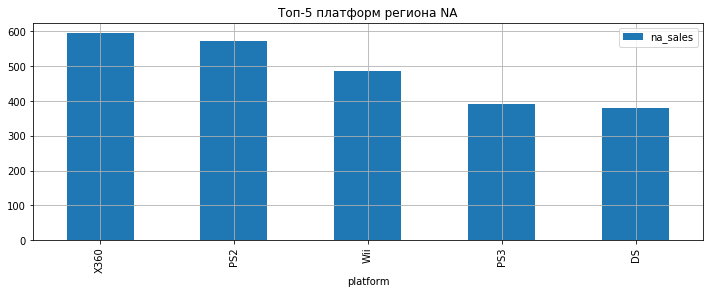

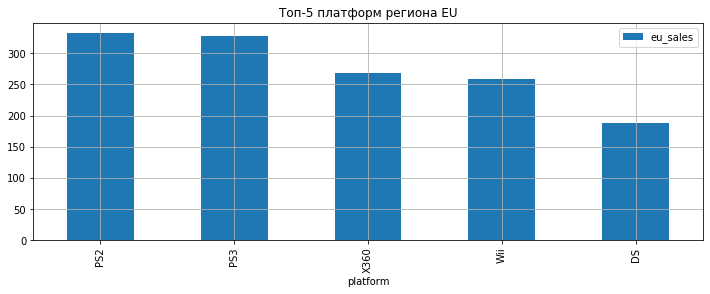

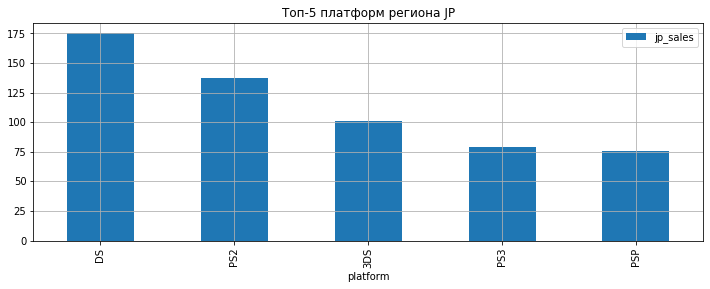

In [ ]:
# Заполнить информацию проще в цикле по столбцам - эта конструкция не самая быстрая, но улучшает читаемость
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    # Заполнение информации о платформах региона
    top5_platforms_in_region = df[['platform', region]].groupby('platform').sum().nlargest(5, region).reset_index()
    # Добавление графика топ-5 платформ в региональную картину
    top5_platforms_graphics = top5_platforms_in_region.plot(x='platform',
                                                            kind='bar',
                                                            grid=True,
                                                            figsize=(12, 4),
                                                            title=f'Топ-5 платформ региона {region[:2].upper()}');

Полученные данные однозначно подчёркивают различия в предпочтениях игроков разных регионов:  
1) Пользователи региона NA приносят больше всего прибыли, и предпочитают платформы X360, PS2, Wii, PS3 и DS;  
2) Пользователи региона EU предпочитают платформы PS2, PS3, X360, Wii и DS. Самая прибыльная платформа в регионе - PS2, но она приносит меньше прибыли чем 5-я платформа в американском топе - DS;  
3) Пользователи региона JP приносят меньше всего прибыли и предпочитают платформы DS, PS2, 3DS, PS3 и PSP. Примечательно, что DS в топах предыдущих двух регионов находится на пятом месте, а в японском регионе - на первом. При этом, прибыль с этой платформы всё равно не превышает прибыль платформы в других регионах.

## Региональный анализ популярности жанров

Так как между предпочтениями платформ и отношением к покупке игр, в регионах есть различия, то стоит отдельно исследовать и популярность жанров - в разных регионах исторически некоторые жанры могут вызывать особую симпатию или отторжение.

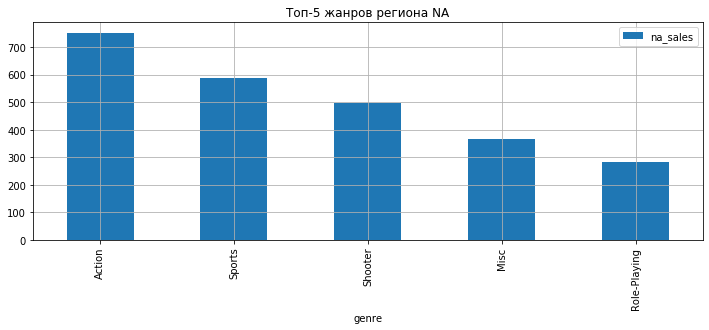

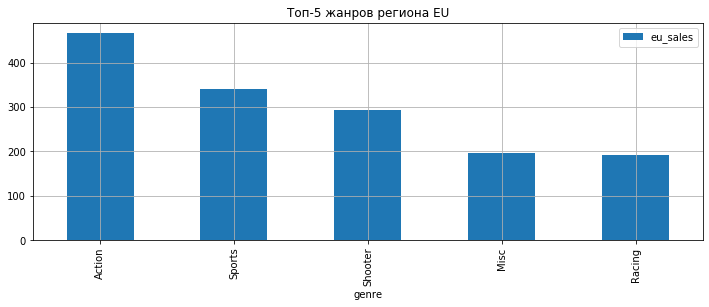

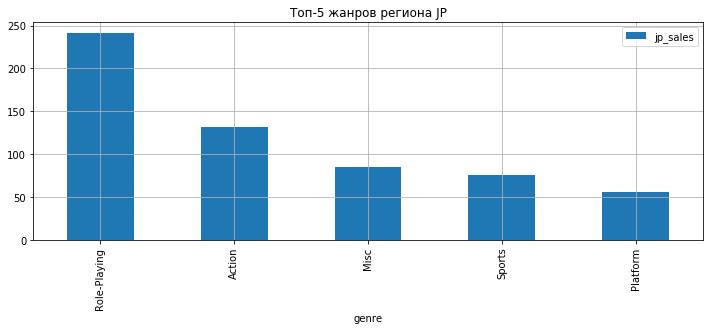

In [ ]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    # Заполнение информации о жанрах в регионе
    top5_genres_in_region = df[['genre', region]].groupby('genre').sum().nlargest(5, region).reset_index()
    # Добавление графика топ-5 жанров в региональную картину
    top5_genres_graphics = top5_genres_in_region.plot(x='genre',
                                                      kind='bar',
                                                      grid=True,
                                                      figsize=(12, 4),
                                                      title=f'Топ-5 жанров региона {region[:2].upper()}');

Как и в случае с предпочтениями в платформах, пользователи разных регионов также предпочитают разные жанры. Ожидаемо, продажи в северо-американском регионе выше европейских, а европейские выше японских. При этом, в регионах NA и EU жанровые предпочтения практически совпадают, отличаясь лишь последним пунктом в топ-5. Объясняется это вполне закономерной схожестью преобладающих культур в регионе. В японском же регионе игроки отдают большее предпочтение РПГ играм, почти в два раза превышающее предпочтение к другим жанрам, таким как Action и Misc.

## Региональный анализ влияния рейтинга ESRB на продажи

Исходя из различий и сходств культур в рассматриваемых регионах, можно выдвинуть ещё одно предположение - в разных регионах по разному учитывают возрастной рейтинг ESRB при покупке видеоигр. Ввиду ограниченного количества категориальных групп, можно проверить данное утверждение с применением общего графика продаж для всех рассматриваемых регионов.

Построим необъодимый график и отсортируем возрастные категории по самому продаваемому региону - северо-американскому (NA).

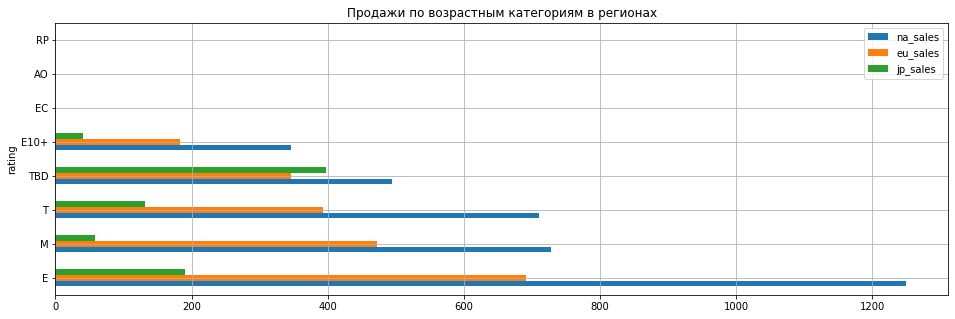

In [ ]:
df[['rating',
    'na_sales',
    'eu_sales',
    'jp_sales']].groupby('rating').sum().sort_values(ascending=False,
                                                     by='na_sales').plot(kind='barh',
                                                                         grid=True,
                                                                         figsize=(16, 5),
                                                                         title=f'Продажи по возрастным категориям в регионах');

Построенный график демонстрирует схожесть продаж категорий в разных регионах: в зависимости от категории, продажи внутри региона повышаются или понижаются. Исключением из правила являются продажи тех игр, чья группа не была указана.

Выведем статистику продаж по возрастным категориям внутри каждого региона - это поможет точнее определить проблему. Для лучшего восприятия проблематики TBD, датафреймы лучше выводить не в одной таблице, а по отдельности.

In [ ]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    print(f'Топ возрастных категорий для региона {region[:2].upper()}')
    # Вывод информации о возрастных категориях в регионе
    df[['rating', region]].groupby('rating').sum().sort_values(by=region, ascending=False).reset_index()

Топ возрастных категорий для региона NA


,rating,na_sales
0,E,1249.26
1,M,727.80
2,T,709.86
3,TBD,494.40
4,E10+,345.50
5,EC,1.53
6,AO,1.26
7,RP,0.00


Топ возрастных категорий для региона EU


,rating,eu_sales
0,E,690.61
1,M,472.40
2,T,392.71
3,TBD,345.81
4,E10+,183.33
5,AO,0.61
6,EC,0.11
7,RP,0.03


Топ возрастных категорий для региона JP


,rating,jp_sales
0,TBD,396.86
1,E,189.91
2,T,131.01
3,M,57.84
4,E10+,40.20
5,AO,0.00
6,EC,0.00
7,RP,0.00


Три получившихся топа отображают проблему отсутствующих данных более явно чем если бы они были представлены в одной выборке. Так, обнаружилось, что в северо-американском и европейском регионе отсутствующих значений хватило на 4-е место в топе, а в японском топе, TBD превозшло любую другую категорию.

Также, в каждом из регионов есть три возрастных группы, игры в которых практически не имеют продаж - **AO** *(Только для взрослых 18+)*, **EC** *(Для детей младшего возраста 3+)*, и **RP** *(Рейтинг ожидается)*. В случае группы RP, почти полное отсутствие продаж объясняется значением категории: она используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

С другими двумя категориями, отсутствие продаж крайне сомнительно - игры для взрослых, а также развивающие игры для малышей, хоть и имеют сравнительно низкие продажи ввиду своей специфики, в ряде случаев приносят высокую прибыль издателям. Примером таких прибылей являются игры серии GTA компании RockStar (*распространяются на многих платформах включая PC и PS4, имеют рейтинг AO*) и видеоигры бренда Barbie различных компаний (*распространяются преимущественно на PC и платформах серии PS*).

Но, на основании одного лишь предположения и нехватки информации о категориях, нельзя осуществить очевидное решение - разделить продажи импровизированной категорию TBD в пользу категорий AO и EC. В исследуемой выборке недостаточно информации для выявления зависимостей такого распределения: например, непонятно, по какому правилу делить продажи категории на две части. Также, возможно, что данные в категории TBD принадлежат не двум обделённым категориям, а включают в себя и остальные группы рейтинга. Следовательно, что-то изменить в существующих данных нельзя, но лучше обратиться с этой проблемой к источникам данных.

Обобщённо же, гипотеза взаимосвязи продаж и жанра подтвердилась лишь в общем случае - возрастные категории действительно влияют на рейтинг продаж: игры с рейтингом E, T, M и E10+ имеют наибольшую продаваемость во всех рассматриваемых регионах. Это правило, как можно увидеть по представленным датафреймам рейтингов, имеет слабо выраженную разницу между регионами - одна и та же возрастная категория, при сравнении с её позицией в рейтинге другого региона, может "плавать" не более чем на 1-2 позиции. 

Следовательно, на возрастные категории стоит смотреть при планировании закупок для высоких продаж, но на сам регион в этом конкретном случае можно не обращать внимания.

# Этап 5. Исследование статистических показателей

Как показали предыдущие исследования, жанр оказывает существенное влияние на продажи игрового продукта и на предпочтения пользователей в разных регионах. Логично предположить, что пользовательский рейтинг и рейтинг критиков могут существенно изменяться в зависимости от жанра.

В текущих системах оценок, анализ оценок не будет интуитивно понятным - столбцы отмасштабированы по разному. Решение проблемы простое: их нужно нормализовать. Но, в данном случае можно обойтись без сложных систем нормализации. Согласно исходным условиям, оценки критиков варьируются от 0 до 100, а оценки пользователей - от 0 до 10. Самым простым решением здесь будет увеличение значений столбца оценок критиков в десять раз - так мы не потеряем важные данные и нормализуем выборку.

In [ ]:
# Выборка жанров и оценок
genres_scores = df[['genre', 'critic_score', 'user_score']]

# Отключаем оповещение, которое ложноположительно возникает в этой версии pandas
pd.options.mode.chained_assignment = None
# Нормализуем столбец оценок пользователей со столбцом оценок критиков
genres_scores['user_score'] = genres_scores['user_score'].multiply(10)
genres_scores.head()

# Включаем оповещение обратно, которое ложноположительно возникает в этой версии pandas
pd.options.mode.chained_assignment = 'warn'

,genre,critic_score,user_score
0,Sports,76.0,80.0
2,Racing,82.0,83.0
3,Sports,80.0,80.0
6,Platform,89.0,85.0
7,Misc,58.0,66.0


Получившуюся выборку можно сгруппировать для каждого жанра и проанализировать с помощью описательных статистик - средней оценки, дисперсии и стандартного отклонения. При их расчёте важно помнить, что анализируется выборка из изначальной генеральной совокупности - устаревшие и неточные данные были удалены из неё. Рассмотрим отдельно оценки критиков и оценки пользователей.

### Описательные статистики оценок критиков для каждого жанра

In [ ]:
# Описательные статистики оценок критиков в зависимости от жанра
genres_critic = genres_scores[['genre',
                               'critic_score']].groupby('genre').agg(['mean',
                                                                      'var',
                                                                      'std'])['critic_score']

genres_critic.sort_values(by='mean', ascending=False).reset_index()

,genre,mean,var,std
0,Role-Playing,72.370423,142.879519,11.953222
1,Strategy,72.068966,135.137096,11.624848
2,Sports,71.969854,193.537884,13.911789
3,Shooter,70.187773,210.222626,14.499056
4,Fighting,68.919192,199.056745,14.108747
5,Simulation,68.368732,153.635824,12.394992
6,Platform,67.902893,171.682062,13.102750
7,Racing,67.778711,200.669055,14.165771
8,Puzzle,67.105505,162.601721,12.751538
9,Misc,66.599606,196.315652,14.011269


Первое впечатление о получившемся наборе описательных статистик таково, что жанры в среднем описываются одинаково - общая средняя оценка от критиков лежит около отметки в 70 баллов. Эта гипотеза подтверждается показателем среднего отклонения - он не очень сильно отличается во всех жанрах. Преимущественно, баллы в жанрах отклоняются от среднего балла на 11-14 баллов. Визуализируем описательные статистики для жанров выборки.

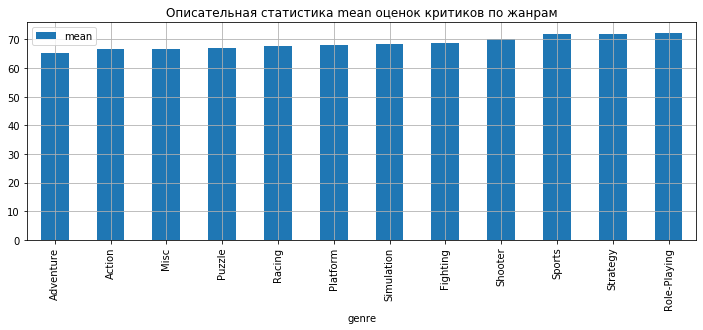

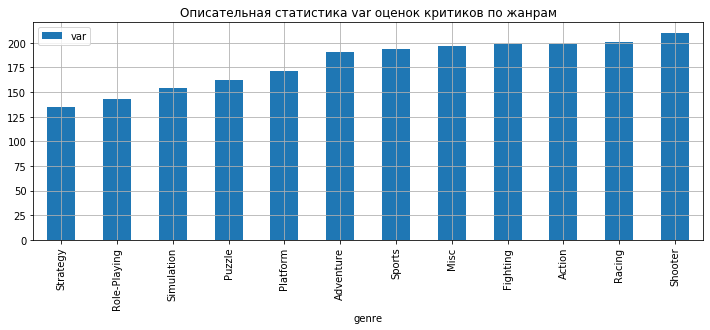

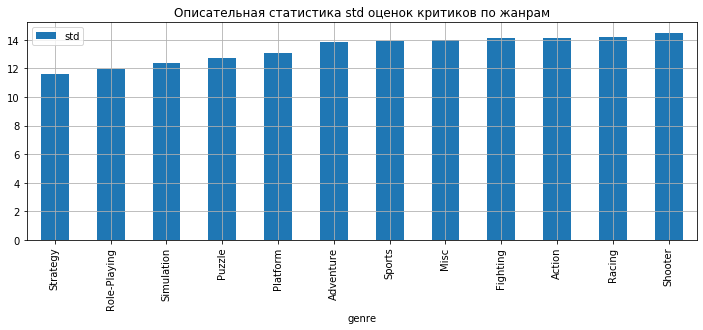

In [ ]:
for stat in ['mean', 'var', 'std']:
    graphic_critic = genres_critic.sort_values(by=stat).plot(y=stat,
                                                             kind='bar',
                                                             grid=True,
                                                             figsize=(12, 4),
                                                             title=f'Описательная статистика {stat} оценок критиков по жанрам');

graphic_critic;

Построенные графики наглядно подтверждают предыдущие выводы. В среднем, оценка игры критиками стремится к отметке в 70 баллов, независимо от жанра. 

Но при этом, жанр действительно влияет на разброс оценок. Так, жанры **Misc**, **Shooter** и **Action** обладают наибольшей дисперсией и стандартным отклонением. Это говорит о широком варьировании оценок.  
В то же время, варьирование оценок происходит и в жанрах с относительно низкими описательными статистиками - **Strategy**, **Role-Playing** и **Simulation**. Данный факт говорит либо о нечестном выставлении баллов, либо, что более вероятно, о стабильности и справедливости оценивания данных жанров.  

Полученные данные о стабильности в оценивании жанров позволяют воспользоваться ещё одним аналитическим методом - построить обобщённую плотность распределения баллов для всех жанров.

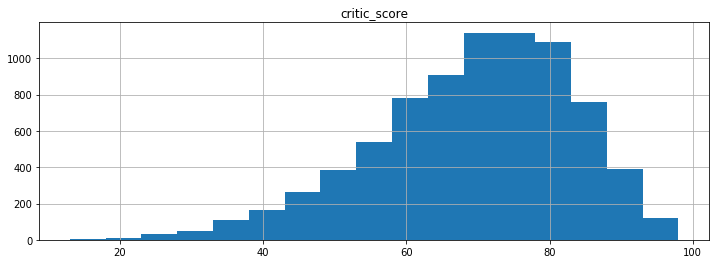

In [ ]:
df[['genre', 'critic_score']].hist(grid=True,
                                   figsize=(12, 4),
                                   bins=17);

Полученная плотность распределения говорит о скошенности набора данных влево (отрицательная скошенность). Но в целом, распределение вполне равномерно. Если бы на стадии предобработки использовалось заполнение пропусков медианным значением, то картина существенно отличалась бы - на месте медианной группы значений возвышался бы огромный выброс по количеству значений.

### Описательные статистики оценок пользователей для каждого жанра

Аналогичным образом, исследуем описательные статистики нормализованных оценок пользователей по каждому жанру. Проверим, соблюдается ли стабильность оценивания для этого случая.

In [ ]:
# Описательные статистики оценок пользователей в зависимости от жанра
genres_user = genres_scores[['genre',
                             'user_score']].groupby('genre').agg(['mean',
                                                                  'var',
                                                                  'std'])['user_score']

genres_user.sort_values(by='mean', ascending=False).reset_index()

,genre,mean,var,std
0,Role-Playing,75.979050,118.826134,10.900740
1,Platform,72.846890,228.034055,15.100797
2,Fighting,72.790155,198.820786,14.100382
3,Strategy,72.500000,269.069966,16.403352
4,Simulation,71.319277,256.254250,16.007943
5,Adventure,71.308475,272.023567,16.493137
6,Puzzle,71.268293,232.591363,15.250946
7,Shooter,70.458889,226.224114,15.040748
8,Action,70.456485,202.360605,14.225351
9,Racing,70.179032,239.675489,15.481456


Как и в случае с оценками критиков, средняя оценка стремится к 70 баллам. Однако, стандартное отклонение имеет больший разброс. Понаблюдаем статистики на графиках.

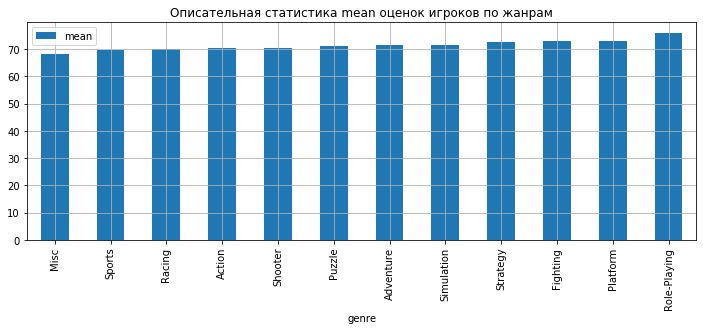

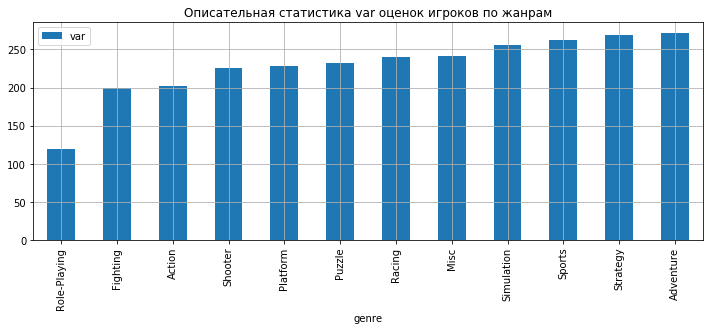

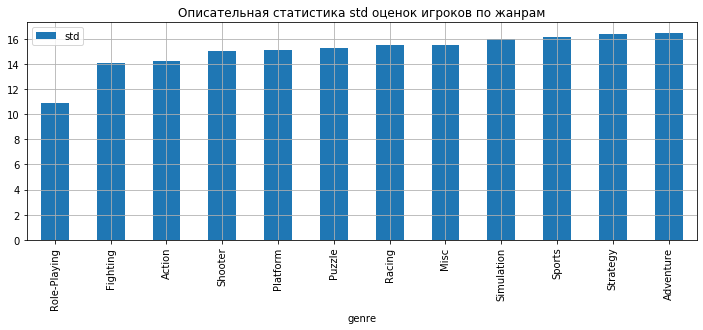

In [ ]:
for stat in ['mean', 'var', 'std']:
    graphics_user = genres_user.sort_values(by=stat).plot(y=stat,
                                                          kind='bar',
                                                          grid=True,
                                                          figsize=(12, 4),
                                                          title=f'Описательная статистика {stat} оценок игроков по жанрам');

graphics_user;

Как и критикам, пользователям важен жанр игры при выставлении оценки. Так, в жанрах **Adventure**, **Strategy** и **Simulation** наибольший разброс баллов, а в жанрах **Role-Playing**, **Puzzle** и **Action** - он минимален. Для критиков набор жанров отличался: жанры с наибольшим разбросом баллов - **Misc**, **Shooter** и **Action**, а с наименьшим - **Strategy**, **Role-Playing** и **Simulation**.

Следовательно, как для критиков так и для пользователей, жанр игры оказывает влияние на выбор оценки. Однако, как видно из показателей разброса, этот выбор не превышает 15 баллов в ту или иную сторону.

Построим гистограмму плотности распределения и для этого случая - она поможет потвердить правильность анализа.

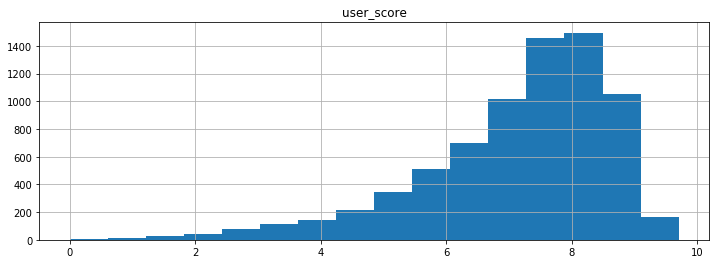

In [ ]:
df[['genre', 'user_score']].hist(grid=True, figsize=(12, 4), bins=16);

Всё верно. Оценки пользователей, как и оценки критиков, отрицательно скошены, но распределяются вполне равномерно. При этом, можно заметить, что пользователи в большей степени склонны к импульсивным решениям - если игра им нравится, то они скорее поставят оценку 70-80 баллов, чем критики.

Объясняется такая скошенность распределения отчасти человеческой психологией, а отчасти - особенностями исходных данных. 

Игры без продаж, как правило, являются слабо известными публике играми и не всегда корректно оцениваются фанатами, и теми кто случайно наткнулся на них. А малое количество продаж соответствует малому количеству отзывов, что делает оценку предвзятой в случае среднего балла.

В случае популярных игр, популярность обеспечивает продукту большое количество продаж, а где большое количество продаж - там большое количество восторженных отзывов. У таких популярных продуктов первые отзывы, как правило, завышены благодаря ожиданиям игроков. Последующие же оценки ставятся пользователями с некоторой долей влияния уже имеющихся оценок - они помогают сформировать мнение, не сильно выделяясь из основной массы.

Критики более объективно воспринимают процесс оценивания, но и им не чуждо человеческое. По этой причине, распределение оценок критиков также имеет смещение, но в области медианы там не столь большое количество значений, что приближает распределение к нормальному.

# Этап 6. Проверка гипотез

Дополняя исследование пользовательских рейтингов, можно аналитически проверить несколько гипотез.

In [ ]:
# Зададим пороговое значение alpha для тестов
alpha = 0.05

## Равенство средних оценок пользователей для платформ Xbox One и PC

Предположим, что средние оценки пользователей одинаковы для платформ Xbox One и PC. Для этого, воспользуемся концепцией статистического вывода гипотез. 

В качестве **нулевой гипотезы** возьмём искомое утверждение - "Средние оценки пользователей одинаковы для платформ XOne и PC". Данная формулировка позволяет использовать знак равенства в атомарных утверждениях, что является базовым критерием для выбора нулевой гипотезы.  
В качестве **альтернативной гипотезы** берётся некое противовесное предположение, которое бы использовалось в том случае, если нулевая гипотеза окажется неверной. В данном случае, оно сводится к формулировке "Средние оценки пользователей отличаются для платформ XOne и PC".

После формулировки гипотез, можно приступать к анализу. Он осуществляется по схеме гипотезы о равенстве средних двух генеральных совокупностей. Сперва, выделим фреймы нужных данных для периода 2010-2016гг - это актуализирует результаты.

In [ ]:
# Выборка оценок пользователей для Xbox One за последние шесть лет, но с фильтрацией NaN за счёт равенства user_score
hyp_xone = df.query('(platform == "XOne") and (year_of_release >= 2010) and (user_score == user_score)')['user_score']

# Выборка оценок пользователей для PC за последние шесть лет, но с фильтрацией NaN за счёт равенства user_score
hyp_pc = df.query('(platform == "PC") and (year_of_release >= 2010) and (user_score == user_score)')['user_score']

Затем, проверим возможное равенство дисперсий выборок.

In [ ]:
print(f'Дисперсия для PC: {hyp_pc.var()}')
print(f'Дисперсия для Xbox One: {hyp_xone.var()}')
print(f'Дисперсия для PC больше чем дисперсия для XOne на {hyp_pc.var() / hyp_xone.var() - 1:.1%}')

Дисперсия для PC: 2.450446015110894
Дисперсия для Xbox One: 1.9069968429360695
Дисперсия для PC больше чем дисперсия для XOne на 28.5%


29% различия между дисперсиями. Следовательно, дисперсии выборок нельзя считать примерно равными. В анализе, параметр equal_var необходимо установить равным False.

In [ ]:
res_xone_pc = st.ttest_ind(hyp_xone, hyp_pc, equal_var=False).pvalue
print(f'P-уровень значимости равен {res_xone_pc}')

if res_xone_pc < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-уровень значимости равен 0.9801634129117883
Не получилось отвергнуть нулевую гипотезу


Как видно из полученных результатов, мы не можем отвергнуть нулевую гипотезу о равенстве средних оценок для платформ Xbox One и PC - это обусловлено крайне высоким p-уровнем значимости. На примере, посмотрим средние значения для текущего периода времени.

In [ ]:
print(f'Средняя оценка пользователей PC: {hyp_pc.mean()}')
print(f'Средняя оценка пользователей Xbox One: {hyp_xone.mean()}')

Средняя оценка пользователей PC: 6.5181818181818185
Средняя оценка пользователей Xbox One: 6.521428571428572


Оценки за актуальный период времени действительно очень схожи, но принять предположение всё равно пока нельзя - p-уровень значимости не является достаточным условием для принятия нулевой гипотезы, его достаточно лишь для её опровержения.

## Равенство средних оценок пользователей для жанров Action и Sports

Предположим, что средние оценки пользователей отличаются для жанров Action и Sports. Данная задача решается аналогично анализу предыдущего утверждения. 

В качестве **нулевой гипотезы** здесь нужно взять противовесное утверждение "Средние оценки пользователей одинаковы для жанров Action и Sports", так как нулевая гипотеза предполагает наличие равенства в атомарных утверждениях.  
В качестве **альтернативной гипотезы** берётся искомое утверждение "Средние оценки пользователей различаются для жанров Action и Sports".

После формулировки гипотез, можно приступать к анализу. Он осуществляется по схеме гипотезы о равенстве средних двух генеральных совокупностей. Сперва, выделим нужные данные в отдельные фреймы, помня о наличии пропусков и необходимости актуализировать временной период.

In [ ]:
# Выборка оценок пользователей для жанра Action за последние шесть лет, но с фильтрацией NaN за счёт равенства user_score
hyp_action = df.query('(genre == "Action") and (year_of_release >= 2010) and (user_score == user_score)')['user_score']

# Выборка оценок пользователей для жанра Sports за последние шесть лет, но с фильтрацией NaN за счёт равенства user_score
hyp_sports = df.query('(genre == "Sports") and (year_of_release >= 2010) and (user_score == user_score)')['user_score']

Затем, проверим возможное равенство дисперсий выборок.

In [ ]:
print(f'Дисперсия для жанра Sports: {hyp_sports.var()}')
print(f'Дисперсия для жанра Action: {hyp_action.var()}')
print(f'Дисперсия для Sports больше чем дисперсия для Action на {hyp_sports.var() / hyp_action.var() - 1:.1%}')

Дисперсия для жанра Sports: 2.8356344151248614
Дисперсия для жанра Action: 1.8501475426606517
Дисперсия для Sports больше чем дисперсия для Action на 53.3%


53% различия между дисперсиями. Следовательно, дисперсии выборок нельзя считать примерно равными. В анализе, параметр equal_var необходимо установить равным False.

In [ ]:
res_action_sports = st.ttest_ind(hyp_action, hyp_sports, equal_var=False).pvalue
print(f'P-уровень значимости равен {res_action_sports}')

if res_action_sports < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

P-уровень значимости равен 1.4516152467844418e-15
Отвергаем нулевую гипотезу


Полученные результаты позволяют отвергнуть нулевую гипотезу о равенстве средних оценок пользователей в жанрах Action и Sports. Следовательно, средние оценки пользователей в данных жанрах равны.

# Этап 7. Общий вывод

В ходе данной работы была проведена предобработка исходных данных, вместе с последующим их анализом, что позволило отработать принцип работы с данными.

В ходе анализа были определены и опровергнуты некоторые гипотезы касательно закономерностей, определяющих успешность выпущенной игры. Это позволяет успешнее планировать рекламные кампании и делать ставку на потенциально популярный продукт. Так как данные анализировались для периода за последние 16 лет, и для периода за последние 6 лет, то по итогу были получены статистически значимые результаты как для прогнозирования развития платформ, так и для прогнозирования прибыльности выпускаемых игр, в контексте современного мира.  

Долгосрочный анализ дал возможность установить примерный срок жизни платформы - он составил 10-11 лет.  
Краткосрочный же анализ позволил определить самые прибыльные платформы последних шести лет - ими оказались Xbox One (XOne) и PS4. Данные платформы, на момент последнего года анализа, уже перешли на стадию постепенного падения прибылей, но ещё способны конкурировать с другими платформами. Например, с платформами 3DS, WiiU и PC. Их прибыль также падает, но всё ещё остаётся достаточно существенной для учёта данных платформ.

К примеру, прибыли от продаж игр для PS4 широко варьируются в промежутка от 18 до 165 млн долларов, а у WiiU - сравнительно узкий ценовой охват с несколькими значимыми выбросами. Это значит, что хоть у WiiU разброс цен меньше, игры для PS4 продаются больше и лучше, а медианно - приносят больше выгоды.

Ещё одно следствие из анализа связано с влиянием вторичных факторов на продажи. Оценки критиков имеют слабое влияние на продажи игр для PS4, и ещё меньшее - для других платформ. Оценки пользователей, несмотря на их гипотетическое духовное родство с возможным покупателем, и вовсе не оказывают значимого влияния на продажи.

При этом, игровой жанр оказывает куда более значимое влияние на продажи. Так, самые популярные жанры Action, Sports и Shooter по отдельности принесли продаж больше чем непопулярные жанры Strategy, Puzzle и Adventure вместе взятые.

Однако, важность жанра и платформы стоит учитывать регионально - исследование показало различия в предпочтениях между северо-американским, европейским и японским регионами. Рекомендации лучше сформулировать для каждого региона отдельно:  

1) **Северо-американский регион (NA)**:  
    - Самый прибыльный регион: максимальные продажи у X360 (595.74 млн. $), минимальные продажи у DS (380.31 млн. $);  
    - Платформы с лучшими продажами: X360, PS2, Wii, PS3 и DS;
    - Жанры с лучшими продажами: Action, Sports, Shooter, Misc, Role-Playing;  
    - Возрастные категории с лучшими продажами: E, M, T, E10+;  
2) **Европейский регион (EU)**:  
    - Средний по прибыли регион: максимальные продажи у PS2 (332.63 млн. $), минимальные продажи у DS (188.41 млн. $);  
    - Платформы с лучшими продажами: PS2, PS3, X360, Wii и DS;  
    - Жанры с лучшими продажами: Action, Sports, Shooter, Misc, Racing;  
    - Возрастные категории с лучшими продажами: E, M, T, E10+;  
3) **Японский регион (JP)**:  
    - Регион с самой низкой прибылью: максимальные продажи у DS (175.00 млн. $), минимальные продажи у PS3 (79.41 млн. $);  
    - Платформы с лучшими продажами: DS, PS2, 3DS, PS3 и PSP;  
    - Жанры с лучшими продажами: Role-Playing, Action, Misc, Sports, Platform;  
    - Возрастные категории с лучшими продажами: E, T, M, E10+.  

Дальнейшее статистическое исследование описательных характеристик оценок критиков и пользователей также выявило влияние жанра и на данную категорию. Оценки и критиков и пользователей стремятся к средней оценке в 70 баллов, со стандартным отклонением в 10-15 баллов. Но при этом, заметно предпочтение критиков жанрам Misc, Shooter и Action, а пользователей - жанрам Adventure, Strategy и Simulation. Сами же оценки в обоих случаях распределены достаточно равномерно, но с отрицательной скошенностью.

Отдельно стоит выделить и проверку нескольких гипотез касательно существующих данных. Так, была опровергнута гипотеза о равенстве средних оценок пользователей для платформ Xbox One и PC - вероятность случайно получить такой результат оказалась слишком низкой. Гипотеза о неравенстве средних оценок пользователей для жанров Action и Sports также была опровергнута - в ходе решения данной задачи была обнаружена достаточно высокая (0.1..) вероятность случайно получить равенство средних оценок пользователей в этих жанрах.

Таким образом, проведённое исследование позволило разносторонне проанализировать статистические данные об играх и их продажах, а также найти разнообразные закономерности между продажами игр

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Здорово, что по каждому пункту работы приведен вывод.     

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Помарки исправлены, и теперь работа выполнена хорошо. У тебя получился крутой проект, молодец. Поздравляю со сданным проектом. Надеюсь, он был интересен и познавателен. Спасибо за столь подробные и исчерпывающие комментарии по исправлениям. Успехов в дальнейшем пути :)

</div>